In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(
    host='localhost',  
    user='root',
    password='myaccount@09',
    database='ecommerce'
)

cur = db.cursor()

# **1. List all unique cities where customers are located.**

In [2]:
query = "select distinct customer_city from customers"

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# **2. Count the number of orders placed in 2017.**

In [3]:
query ="select count(order_id) from orders where year(order_purchase_timestamp) = 2017"

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are ", data[0][0]

('total orders placed in 2017 are ', 45101)

# **3.Find the total sales per category.**

In [4]:
query = """
SELECT 
    Upper(products.product_category) AS category,
    round(SUM(payments.payment_value),2) AS sales
FROM 
    products
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    category
"""

cur.execute(query)
data = cur.fetchall()
data


[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

# **4. Calculate the percentage of orders that were paid in installments.**

In [5]:
query = """
SELECT 
   (sum(case when payment_installments >=1 then 1 else 0 end))/count(*)*100 
from payments
"""

cur.execute(query)
data = cur.fetchall()
"the percentage of orders that were paid in installments is " ,data[0][0]

('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

# **5. Count the number of customers from each state.** 

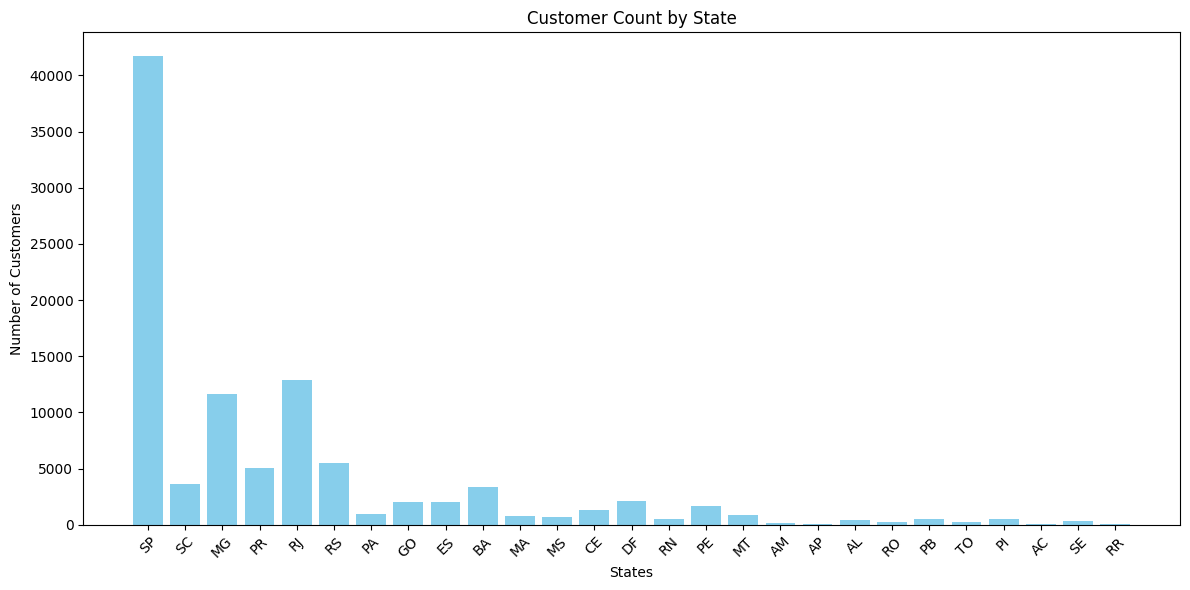

In [6]:
query = """
SELECT 
    customer_state, 
    COUNT(customer_id) AS customer_count
FROM 
    customers
GROUP BY 
    customer_state
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["state", "customer_count"])

# Plot with larger figure and rotated labels
plt.figure(figsize=(12,6))
plt.bar(df["state"], df["customer_count"], color='skyblue')
plt.xlabel("States")
plt.ylabel("Number of Customers")
plt.title("Customer Count by State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **6. Calculate the number of orders per month in 2018.**

✅ Total orders placed in 2018: 54011


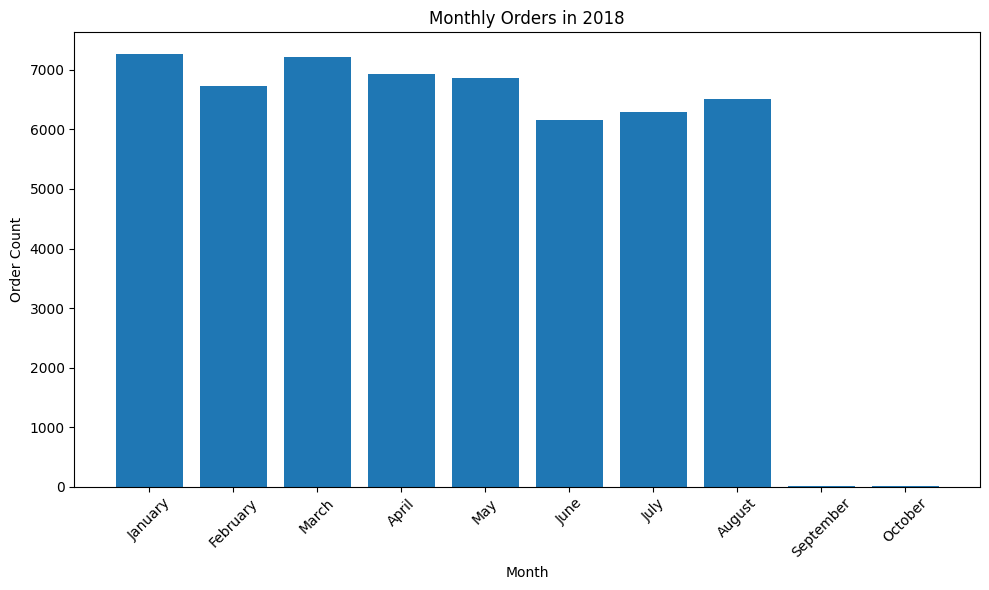

In [7]:
query = """
SELECT 
    MONTH(order_purchase_timestamp) AS month_number,
    MONTHNAME(order_purchase_timestamp) AS month_name,
    COUNT(order_id) AS order_count
FROM 
    orders
WHERE 
    YEAR(order_purchase_timestamp) = 2018
GROUP BY 
    MONTH(order_purchase_timestamp), MONTHNAME(order_purchase_timestamp)
ORDER BY 
    month_number;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Month_Number", "Month", "Order_Count"])
print("✅ Total orders placed in 2018:", df["Order_Count"].sum())

# Plot
plt.figure(figsize=(10,6))
plt.bar(df["Month"], df["Order_Count"])
plt.title("Monthly Orders in 2018")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **7. Find the average number of products per order, grouped by customer city.**

In [8]:
query = """
with count_per_order as (SELECT orders.order_id , orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id , orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2)
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city


"""

cur.execute(query)
data = cur.fetchall()
data

[('sao paulo', Decimal('1.16')),
 ('sao jose dos campos', Decimal('1.14')),
 ('porto alegre', Decimal('1.17')),
 ('indaial', Decimal('1.12')),
 ('treze tilias', Decimal('1.27')),
 ('rio de janeiro', Decimal('1.15')),
 ('mario campos', Decimal('1.33')),
 ('guariba', Decimal('1.00')),
 ('cuiaba', Decimal('1.20')),
 ('franca', Decimal('1.25')),
 ('tocos', Decimal('1.00')),
 ('januaria', Decimal('1.18')),
 ('campinas', Decimal('1.16')),
 ('embu-guacu', Decimal('1.24')),
 ('cerquilho', Decimal('1.17')),
 ('belo horizonte', Decimal('1.14')),
 ('taubate', Decimal('1.13')),
 ('arcos', Decimal('1.12')),
 ('monte mor', Decimal('1.08')),
 ('vianopolis', Decimal('1.33')),
 ('cacapava', Decimal('1.16')),
 ('sao jose da tapera', Decimal('1.00')),
 ('belford roxo', Decimal('1.09')),
 ('pedro leopoldo', Decimal('1.25')),
 ('arroio do sal', Decimal('1.29')),
 ('sao bernardo do campo', Decimal('1.14')),
 ('brasilia', Decimal('1.13')),
 ('ribeirao pires', Decimal('1.12')),
 ('contagem', Decimal('1.14')),

# **8.Calculate the percentage of total revenue contributed by each product category.**

In [9]:
query = """
SELECT 
    UPPER(products.product_category) AS category,
    ROUND(SUM(payments.payment_value), 2) AS sales,
    ROUND(SUM(payments.payment_value) * 100 / 
          (SELECT SUM(payment_value) FROM payments), 2) AS percentage_contribution
FROM 
    products
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    category
ORDER BY 
    percentage_contribution DESC;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category", "Sales", "Percentage_Contribution"])
print(df)


                       Category       Sales  Percentage_Contribution
0                BED TABLE BATH  1712553.67                    10.70
1                 HEALTH BEAUTY  1657373.12                    10.35
2          COMPUTER ACCESSORIES  1585330.45                     9.90
3          FURNITURE DECORATION  1430176.39                     8.93
4               WATCHES PRESENT  1429216.68                     8.93
..                          ...         ...                      ...
69              HOUSE COMFORT 2     1710.54                     0.01
70               CDS MUSIC DVDS     1199.43                     0.01
71                     PC GAMER     2174.43                     0.01
72  FASHION CHILDREN'S CLOTHING      785.67                     0.00
73       INSURANCE AND SERVICES      324.51                     0.00

[74 rows x 3 columns]


# **9. Identify the correlation between product price and the number of times a product has been purchased.**

In [10]:
query = """
SELECT 
    products.product_category AS category,
    COUNT(order_items.product_id) AS order_count,
    ROUND(AVG(order_items.price), 2) AS avg_price
FROM 
    products
JOIN 
    order_items ON products.product_id = order_items.product_id
GROUP BY 
    products.product_category
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category", "Order_Count", "Avg_Price"])

# Extracting arrays
arr1 = df["Order_Count"]
arr2 = df["Avg_Price"]

# Calculating correlation
correlation = np.corrcoef(arr1, arr2)
print(" Correlation matrix:\n", correlation)


 Correlation matrix:
 [[ 1.         -0.10631514]
 [-0.10631514  1.        ]]


# **10. Calculate the total revenue generated by each seller, and rank them by revenue.**

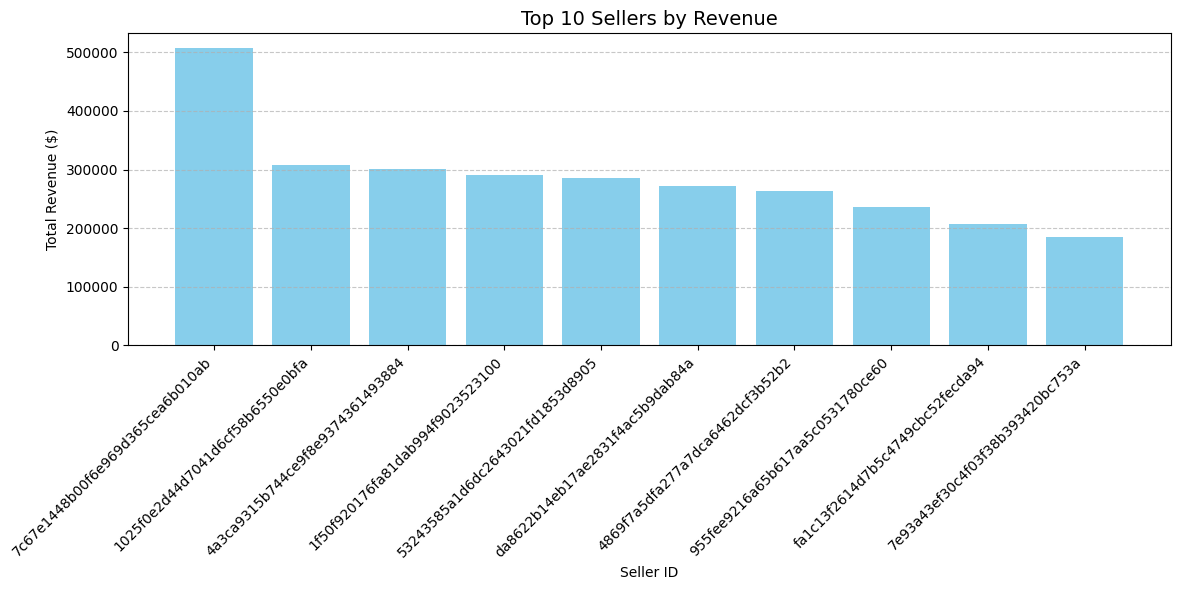

In [11]:
query = """
SELECT 
    *, 
    DENSE_RANK() OVER (ORDER BY total_revenue DESC) AS rn 
FROM 
(
    SELECT 
        order_items.seller_id,
        ROUND(SUM(payments.payment_value), 2) AS total_revenue
    FROM 
        order_items 
    JOIN 
        payments ON order_items.order_id = payments.order_id
    GROUP BY 
        order_items.seller_id
) AS a
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Seller_ID", "Total_Revenue", "Rank"])

top10 = df.sort_values("Total_Revenue", ascending=False).head(10)

#  Bar chart
plt.figure(figsize=(12, 6))
plt.bar(top10["Seller_ID"], top10["Total_Revenue"], color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Sellers by Revenue", fontsize=14)
plt.xlabel("Seller ID")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

